<a href="https://colab.research.google.com/github/luisdiaz1997/DataScienceCourse/blob/master/Week3_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WELCOME BACK TO SACNAS' PYTHON WORKSHOP 
hosted by Luis and Emily


### Introduction:
Sign in and grab food! 
### Import the necessary libraries/packages:
There are tools you can download into your code to implement. Think of these like your toolbox, to create plots, analyze data, and endless possibilities 


In [0]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### Import data and assign it to a variable called tips

In [0]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'


In [0]:
df = pd.read_csv(url, index_col= 0)

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# .describe()
Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.



In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Working with our dataset

# For Loops
## a for-loop is a control flow statement for specifying iteration, which allows code to be executed repeatedly.



In [0]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [7]:
for num in x:
  print(num)

1
2
3
4
5
6
7
8
9
10


In [8]:
for num in x:
  print('The square of', num, 'is', num**2)

The square of 1 is 1
The square of 2 is 4
The square of 3 is 9
The square of 4 is 16
The square of 5 is 25
The square of 6 is 36
The square of 7 is 49
The square of 8 is 64
The square of 9 is 81
The square of 10 is 100


### What day are people more likely to tip?


In [9]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
df[df.day == 'Sun'].tip.mean()

3.255131578947369

In [11]:
df[df.day == 'Sat'].tip.mean()

2.993103448275862

### How can we automate a print statement using a For loop?

In [12]:
for day in df.day.unique():
  current_mean = df[df.day == day].tip.mean()
  print('In', day, 'people tip on average', current_mean)

In Sun people tip on average 3.255131578947369
In Sat people tip on average 2.993103448275862
In Thur people tip on average 2.771451612903226
In Fri people tip on average 2.734736842105263


### How do we store these values? 

In [13]:
A = list()
A

[]

In [0]:
A.append('12')

In [15]:
A

['12']

In [16]:
mean_list = list()
for day in df.day.unique():
  current_mean = df[df.day == day].tip.mean()
  mean_list.append([day, current_mean])
  print('In', day, 'people tip on average', current_mean)


In Sun people tip on average 3.255131578947369
In Sat people tip on average 2.993103448275862
In Thur people tip on average 2.771451612903226
In Fri people tip on average 2.734736842105263


In [0]:
mean_list = [[day, df[df.day == day].tip.mean()] for day in df.day.unique()]

In [18]:
mean_list

[['Sun', 3.255131578947369],
 ['Sat', 2.993103448275862],
 ['Thur', 2.771451612903226],
 ['Fri', 2.734736842105263]]

In [0]:
Z  = lambda x: x**2

In [20]:
Z(10)

100

In [21]:
max(mean_list, key = lambda x: x[1])

['Sun', 3.255131578947369]

In [22]:
min(mean_list, key = lambda x: x[1])

['Fri', 2.734736842105263]

### Who tips more? Smokers or non smokers?





### Who tips more? Women or Men


### Plotting

parameters are what you need inside the paranthesis for the function you are calling to work. 

### Create a scatter plot presenting the relationship between total_bill and tip

---



Text(0.5, 1.0, 'Total vs tip')

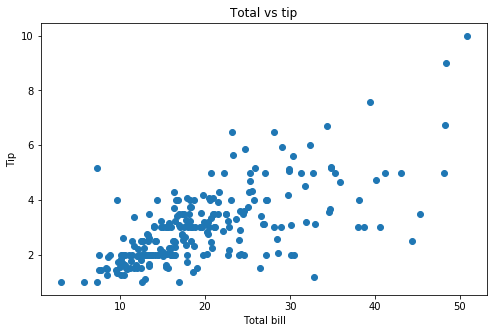

In [23]:
plt.figure(1, figsize = (8, 5))
x = df.total_bill[:, None]
y = df.tip[:, None]
plt.scatter(x, y)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Total vs tip')

# Let's get the slope

In [0]:
model = LinearRegression()

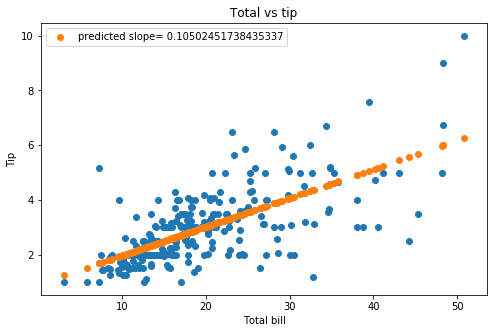

In [25]:
plt.figure(1, figsize = (8, 5))


x = df.total_bill[:, None]
y = df.tip[:, None]


model.fit(x, y)
y_predict = model.predict(x)
plt.scatter(x, y)
plt.scatter(x, y_predict, label = 'predicted slope= ' + str(model.coef_[0][0]))
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Total vs tip')
plt.legend(loc = 'upper left');

## What is the bill vs tip relationship at each day of the week?

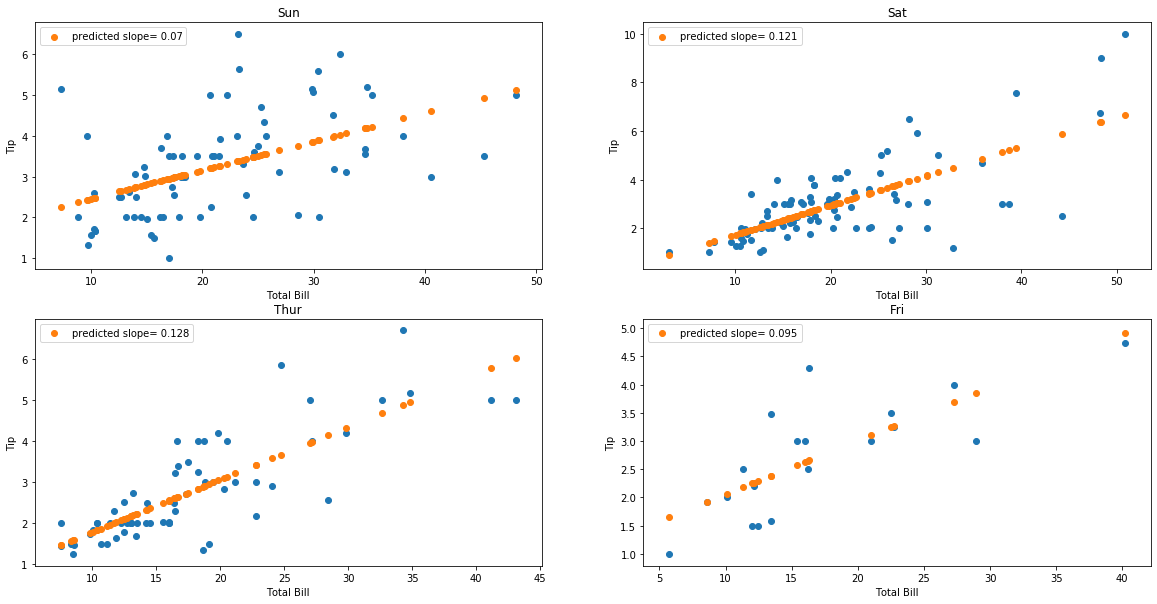

In [32]:
plt.figure(2, figsize = (20, 10))

for i, day in enumerate(df.day.unique()):
  plt.subplot(2, 2, i+1)
  plt.title(day)

  mask = df.day == day

  x = df[mask].total_bill[:, None]
  y = df[mask].tip[:, None]


  model.fit(x, y)
  y_predict = model.predict(x)

  plt.scatter(x, y)
  plt.scatter(x, y_predict, label = 'predicted slope= ' + str(round(model.coef_[0][0], 3)) )
  plt.xlabel('Total Bill')
  plt.ylabel('Tip')
  plt.legend(loc = 'upper left');

# What is the bill vs tip relationship at each time of the day?

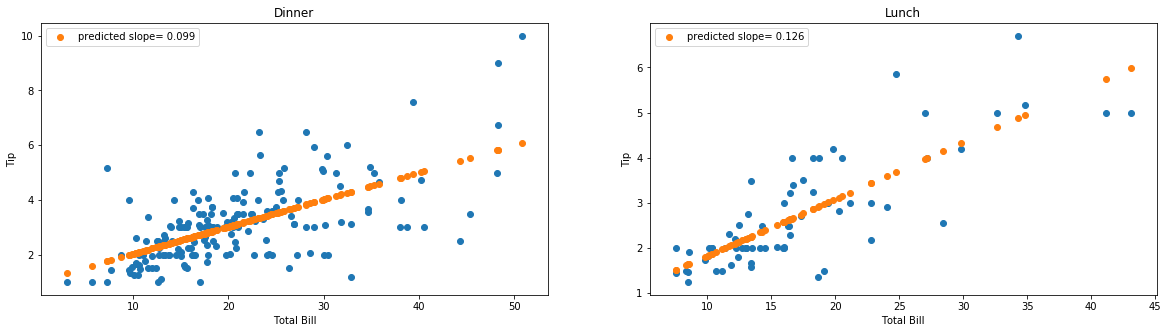

In [31]:
plt.figure(3, figsize = (20, 5))

for i, time in enumerate(df.time.unique()):
  plt.subplot(1, 2, i+1)
  plt.title(time)

  mask = df.time == time

  x = df[mask].total_bill[:, None]
  y = df[mask].tip[:, None]


  model.fit(x, y)
  y_predict = model.predict(x)

  plt.scatter(x, y)
  plt.scatter(x, y_predict, label = 'predicted slope= ' + str(round(model.coef_[0][0], 3)) )
  plt.xlabel('Total Bill')
  plt.ylabel('Tip')
  plt.legend(loc = 'upper left');

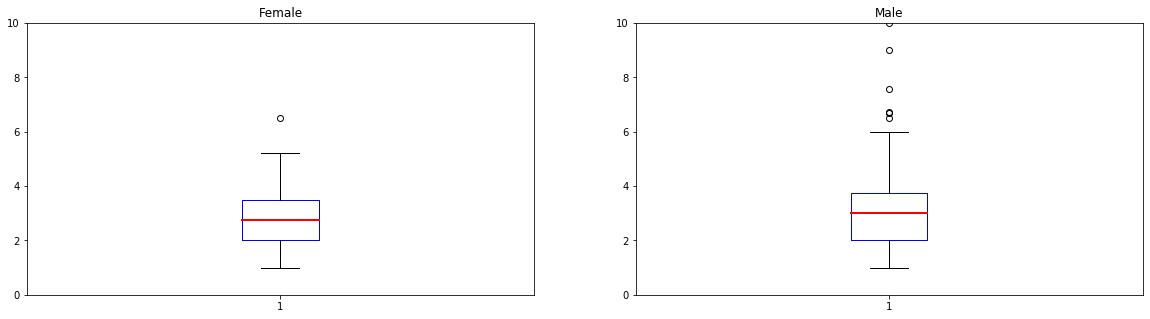

In [54]:
plt.figure(4, figsize = (20, 5))

for i, sex in enumerate(df.sex.unique()):
  plt.subplot(1, 2, i+1)
  plt.title(sex)

  mask = df.sex == sex

  y = df[mask].tip[:, None]

  bp = plt.boxplot(y)

  for median in bp['medians']:
    median.set(color='red', linewidth=2)

  for box in bp['boxes']:
  
    # change fill color
    box.set_color('blue')

  
  plt.ylim([0, 10])